1 - Prepare data

In [97]:
import pandas as pd
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

#Choose the death cases data from hospital.csv from March to August
df = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv')
df['date'] = pd.date_range('2020-02-1', periods=948, freq='D')
mask = (df['date'] > '2021-5-31') & (df['date'] <= '2022-1-31')
cases_malaysia = df.loc[mask][['date','cases_active','cases_new']]
print(cases_malaysia)

In [79]:
#Choose the death cases data from deaths_malaysia.csv from March to August
df = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv')
df  = df.groupby('date').sum()
df['date'] = pd.date_range('2020-03-24', periods=890, freq='D')
mask = (df['date'] > '2021-5-31') & (df['date'] <= '2022-1-31')
hospital = df.loc[mask][['beds_covid','beds','admitted_total','hosp_covid','hosp_pui']]
hospital

,beds_covid,beds,admitted_total,hosp_covid,hosp_pui
date,,,,,
2021-06-01,10730,38285,1994,7676,1280
2021-06-02,10824,38318,1875,7587,1175
2021-06-03,10813,38318,1906,7565,1247
2021-06-04,10871,38318,1833,7337,1191
2021-06-05,10896,38318,1992,7457,1082
...,...,...,...,...,...
2022-01-27,9877,40899,964,2002,888
2022-01-28,9794,40827,955,1844,850
2022-01-29,9781,40827,890,2036,912


In [80]:
icu_initial = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/icu.csv')
icu_initial  = icu_initial.groupby('date').sum()
icu_initial['date'] = pd.date_range('2020-03-24',periods=890, freq='D')
mask = (icu_initial['date'] > '2021-5-31') & (icu_initial['date'] <= '2022-1-31')
icu = icu_initial.loc[mask][['icu_covid','beds_icu_covid','icu_pui']]
icu

,icu_covid,beds_icu_covid,icu_pui
date,,,
2021-06-01,1181,1126,9
2021-06-02,1202,1124,11
2021-06-03,1176,1124,14
2021-06-04,1154,1126,11
2021-06-05,1155,1132,12
...,...,...,...
2022-01-27,124,859,0
2022-01-28,127,859,0
2022-01-29,119,859,0


In [81]:
print(hospital)
print(icu)

            beds_covid   beds  admitted_total  hosp_covid  hosp_pui
date                                                               
2021-06-01       10730  38285            1994        7676      1280
2021-06-02       10824  38318            1875        7587      1175
2021-06-03       10813  38318            1906        7565      1247
2021-06-04       10871  38318            1833        7337      1191
2021-06-05       10896  38318            1992        7457      1082
...                ...    ...             ...         ...       ...
2022-01-27        9877  40899             964        2002       888
2022-01-28        9794  40827             955        1844       850
2022-01-29        9781  40827             890        2036       912
2022-01-30        9781  40827             901        2070       927
2022-01-31        9723  40837             864        2064       906

[245 rows x 5 columns]
            icu_covid  beds_icu_covid  icu_pui
date                                         

In [82]:
totalFeatures = pd.merge(hospital, icu, on = "date")
print("The resultant DataFrame:")
print(totalFeatures)

The resultant DataFrame:
            beds_covid   beds  admitted_total  hosp_covid  hosp_pui  \
date                                                                  
2021-06-01       10730  38285            1994        7676      1280   
2021-06-02       10824  38318            1875        7587      1175   
2021-06-03       10813  38318            1906        7565      1247   
2021-06-04       10871  38318            1833        7337      1191   
2021-06-05       10896  38318            1992        7457      1082   
...                ...    ...             ...         ...       ...   
2022-01-27        9877  40899             964        2002       888   
2022-01-28        9794  40827             955        1844       850   
2022-01-29        9781  40827             890        2036       912   
2022-01-30        9781  40827             901        2070       927   
2022-01-31        9723  40837             864        2064       906   

            icu_covid  beds_icu_covid  icu_pui  
da

In [83]:
totalFeatures

,beds_covid,beds,admitted_total,hosp_covid,hosp_pui,icu_covid,beds_icu_covid,icu_pui
date,,,,,,,,
2021-06-01,10730,38285,1994,7676,1280,1181,1126,9
2021-06-02,10824,38318,1875,7587,1175,1202,1124,11
2021-06-03,10813,38318,1906,7565,1247,1176,1124,14
2021-06-04,10871,38318,1833,7337,1191,1154,1126,11
2021-06-05,10896,38318,1992,7457,1082,1155,1132,12
...,...,...,...,...,...,...,...,...
2022-01-27,9877,40899,964,2002,888,124,859,0
2022-01-28,9794,40827,955,1844,850,127,859,0
2022-01-29,9781,40827,890,2036,912,119,859,0


In [84]:
#copied
import numpy as np
# Convert the dataframe to array and join both of the array to combine data
totalFeaturesArray = totalFeatures.to_numpy()


In [85]:
totalFeaturesArray

array([[10730, 38285,  1994, ...,  1181,  1126,     9],
       [10824, 38318,  1875, ...,  1202,  1124,    11],
       [10813, 38318,  1906, ...,  1176,  1124,    14],
       ...,
       [ 9781, 40827,   890, ...,   119,   859,     0],
       [ 9781, 40827,   901, ...,   120,   852,     0],
       [ 9723, 40837,   864, ...,   114,   852,     0]], dtype=int64)

In [86]:
#copied
# Determine multicollinearlity of features (To detmine which models to use)

from statsmodels.stats.outliers_influence import variance_inflation_factor

features_VIF = np.delete(totalFeaturesArray,[0], axis=1).astype('int64')
features_VIF = pd.DataFrame(features_VIF, columns = ['beds','admitted_total', 'hosp_covid', 'hosp_pui', 'icu_covid', 'beds_icu_covid', 'icu_pui'])

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features_VIF.values, i) for i in range(features_VIF.shape[1])]
vif["features"] = features_VIF.columns

vif.round(1) # High correlation, can choose regression model like Ridge, Lasso

,VIF Factor,features
0,109.9,beds
1,179.1,admitted_total
2,148.2,hosp_covid
3,127.2,hosp_pui
4,53.1,icu_covid
5,259.2,beds_icu_covid
6,5.2,icu_pui


In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,10))
scaler.fit(totalFeatures)
scaled_features = scaler.transform(totalFeatures)

In [88]:
scaled_features = pd.DataFrame(scaled_features, columns = ['beds_covid','beds','admitted_total', 'hosp_covid', 'hosp_pui', 'icu_covid', 'beds_icu_covid', 'icu_pui'])
scaled_features
scaled_features_array = scaled_features.to_numpy()


In [89]:
scaled_features.drop(columns=['beds_covid'])
scaled_features

,beds_covid,beds,admitted_total,hosp_covid,hosp_pui,icu_covid,beds_icu_covid,icu_pui
0,1.989087,1.000000,5.735902,5.093367,5.227692,7.492901,4.210938,2.0125
1,2.081414,1.061023,5.310564,5.031662,4.258462,7.620690,4.187500,2.2375
2,2.070610,1.061023,5.421366,5.016409,4.923077,7.462475,4.187500,2.5750
3,2.127578,1.061023,5.160445,4.858331,4.406154,7.328600,4.210938,2.2375
4,2.152134,1.061023,5.728753,4.941530,3.400000,7.334686,4.281250,2.3500
...,...,...,...,...,...,...,...,...
240,1.151261,5.833779,2.054408,1.159464,1.609231,1.060852,1.082031,1.0000
241,1.069737,5.700637,2.022240,1.049919,1.258462,1.079108,1.082031,1.0000
242,1.056968,5.700637,1.789913,1.183037,1.830769,1.030426,1.082031,1.0000
243,1.056968,5.700637,1.829230,1.206610,1.969231,1.036511,1.000000,1.0000


In [90]:
# target = scaled_features_array[:, [0]].astype('int64')
target = scaled_features_array[:, [0]]
target

array([[ 1.98908654],
       [ 2.08141438],
       [ 2.07061006],
       [ 2.1275783 ],
       [ 2.15213358],
       [ 2.28571429],
       [ 2.2955364 ],
       [ 2.30535851],
       [ 2.633417  ],
       [ 2.67663429],
       [ 2.80432173],
       [ 2.78664193],
       [ 2.84164575],
       [ 2.84164575],
       [ 2.95460002],
       [ 2.92316927],
       [ 2.9261159 ],
       [ 2.93593801],
       [ 2.86325439],
       [ 3.05674997],
       [ 3.02924806],
       [ 3.06362545],
       [ 3.08523409],
       [ 3.06362545],
       [ 3.03121248],
       [ 3.03514133],
       [ 3.14318455],
       [ 3.22372585],
       [ 3.21783259],
       [ 3.2276547 ],
       [ 3.25810324],
       [ 3.26596093],
       [ 3.39266616],
       [ 3.45749209],
       [ 3.64607661],
       [ 3.76197752],
       [ 3.79635491],
       [ 3.89555822],
       [ 3.96922405],
       [ 4.08414275],
       [ 4.21870566],
       [ 4.24424315],
       [ 4.31201572],
       [ 4.29924697],
       [ 4.29433592],
       [ 4

In [91]:
from sklearn.model_selection import train_test_split
# Create train test split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3)

#Create train validation split to determine the optimum lambda for ridge regression 
x_train_val, x_val, y_train_val, y_val = train_test_split(x_train, y_train, test_size=0.3)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train, y_train)

# Calculate the accuracy of the model
predict = knn.predict(x_test)

print(predict)

predict = predict.reshape(-1, 1)

# create empty table with 12 fields
trainPredict_dataset_like = np.zeros(shape=(len(predict), 8) )
# put the predicted values in the right field
trainPredict_dataset_like[:,0] = predict[:,0]
# inverse transform and then select the right field
trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]

#predict = scaler.inverse_transform(predict)

print(trainPredict)

print(knn.score(x_test, y_test))


target = scaled_features['beds_covid']
scaled_features.drop(columns=['beds_covid'])
from sklearn.model_selection import train_test_split
# Create train test split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3)
#Create train validation split to determine the optimum lambda for ridge regression 
x_train_val, x_val, y_train_val, y_val = train_test_split(x_train, y_train, test_size=0.3)

In [96]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

1.0


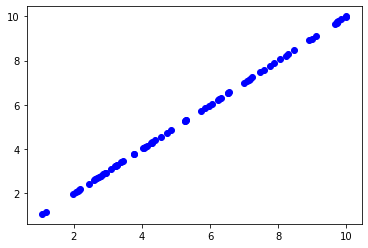

In [105]:
y_pred = regr.predict(x_test)
plt.scatter(y_pred, y_test, color ='b')
# plt.plot(y_pred, y_test, color ='k')

plt.show()